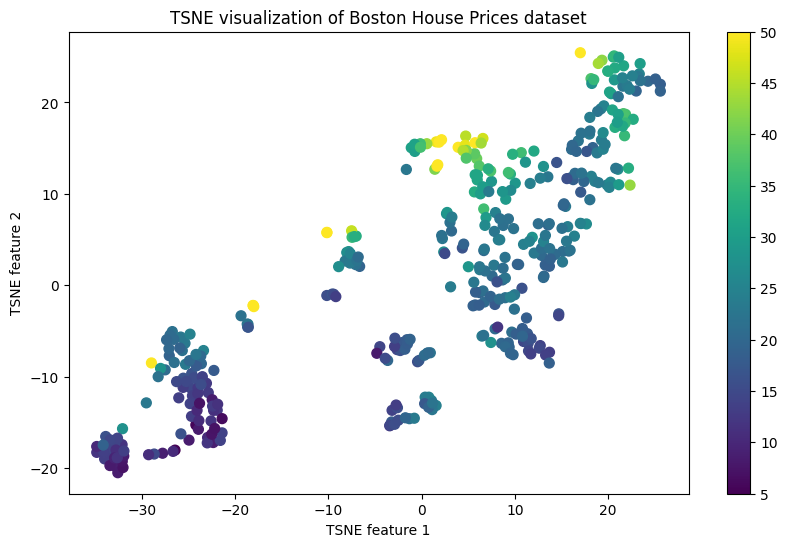

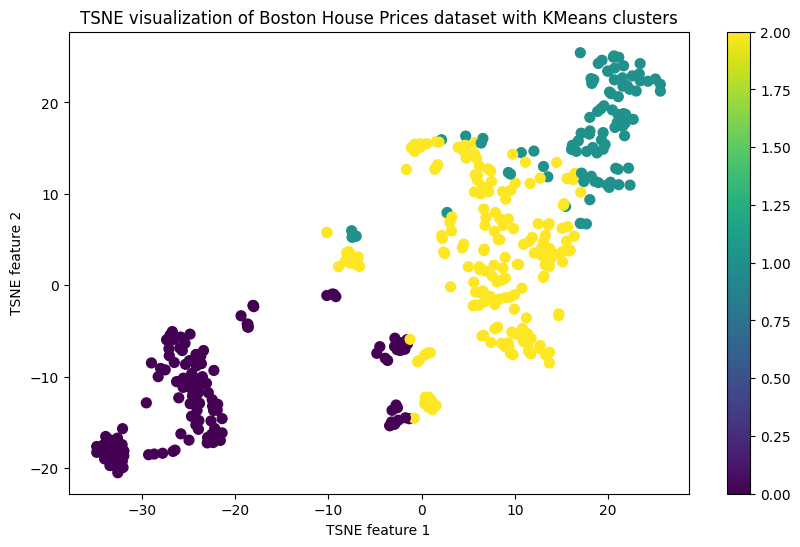

              medv       crim
Cluster                      
0        16.179688  10.715219
1        28.730435   0.081968
2        24.432609   0.429333
              medv      crim
Cluster                     
0        16.455556  9.892942
1        31.627778  0.090096
2        21.460417  0.262269


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Загрузка данных
data_url = "https://github.com/selva86/datasets/raw/master/BostonHousing.csv"
data = pd.read_csv(data_url,sep=',')
X = pd.DataFrame(data)
y = pd.DataFrame(data['medv'])

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.values.ravel(), cmap='viridis', s=50)
plt.colorbar()
plt.title('TSNE visualization of Boston House Prices dataset')
plt.xlabel('TSNE feature 1')
plt.ylabel('TSNE feature 2')
plt.show()

# KMeans кластеризация
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_scaled)

# Диаграмма рассеяния с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.colorbar()
plt.title('TSNE visualization of Boston House Prices dataset with KMeans clusters')
plt.xlabel('TSNE feature 1')
plt.ylabel('TSNE feature 2')
plt.show()

# Средние значения price и CRIM в разных кластерах
X_train['medv'] = y_train.values
X_train['Cluster'] = y_kmeans
mean_values_train = X_train.groupby('Cluster').mean()[['medv', 'crim']]
print(mean_values_train)

# Применение модели KMeans к тестовым данным
y_kmeans_test = kmeans.predict(X_test_scaled)
X_test['medv'] = y_test.values
X_test['Cluster'] = y_kmeans_test
mean_values_test = X_test.groupby('Cluster').mean()[['medv', 'crim']]
print(mean_values_test)
